In [102]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(1, '/Users/sophie/LIGO/PTA/VIPER_SummerSchool')
import numpy as np
import glob
import matplotlib.pyplot as plt
import scipy.linalg as sl

import enterprise
from enterprise.signals import utils
from enterprise.pulsar import Pulsar

import enterprise_extensions
from enterprise_extensions.frequentist import optimal_statistic
from enterprise_extensions import models, model_utils, hypermodel

import corner
from PTMCMCSampler.PTMCMCSampler import PTSampler as ptmcmc
from simFuncs import *
from enterprisePTAs import crnPTA, mcSample
BASE_DIR = "/Users/sophie/LIGO/PTA/VIPER_SummerSchool"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [103]:
??utils.hd_orf

In [ ]:
parfiles = sorted(glob.glob(BASE_DIR + '/mdc2/*.par'))
obstimes = 53000.0 + np.linspace(0.0,20.0,520) * 365.25



In [101]:
distances = [60, 600, 6000]
snrs = []

dist_dict = {}
for dist in distances:
    dist_dict[f"{dist}"] = {}
    dist_dict_local = dist_dict[f"{dist}"]
    
    print(f"Distance is {dist} MPC")
    # libstempo pulsars (have to reset them after adding gwb)
    ltpsrs = create_psrs(parfiles,obstimes, toaerr = .4) # toa error microseconds 
    
    inj_gwb = {"gam":13/3, 
              "amp":1e-14}
      # change params as needed
    pdict = {'gwtheta': 1.75, # DEC 
             'gwphi': 5.,     # RA
             'mc': 5e9,   # Solar mass 
             'dist': dist, # MPC  (from center of solar system )
             'fgw': 2e-8,
             'phase0': 0.0,
             'psi': np.pi/4.0, # polarization angle 
             'inc': 0.0}       # inclination 

    # add gwb 
    add_gwb(ltpsrs,**inj_gwb)
    
    # add GWB to our pulsars
    add_cgw(ltpsrs, pdict, tref = obstimes[0], iters = 1)

    # create libstempo2 pulsars 
    psrs = lt2ent(ltpsrs)
    

    pta = crnPTA(psrs,fixedGamma=True)
    
    os_func = optimal_statistic.OptimalStatistic(psrs, 
                                                 pta = pta, 
                                                 orf = 'hd', 
                                                 gamma_common = inj_gwb["gam"])
    
    p0 = {'gw_log10_A':np.log10(inj_gwb["amp"])
     }
    
    xi, rho, sig, os, os_sig = os_func.compute_os(p0)
    
    dist_dict_local['xi'] = xi
    dist_dict_local['rho'] = rho
    dist_dict_local['os'] = os
    dist_dict_local['os_sig'] = os_sig
    dist_dict_local['snr'] = os / os_sig
    

Distance is 60 MPC
[preProcess.C:158] Warning: PSR J0030+0451 uses DM2+ but does not define DM_SERIES. Assume Taylor. This has behaviour has changed since June 2020!
See https://bitbucket.org/psrsoft/tempo2/issues/27/tempo2-dm-polynomial-is-not-a-taylor

[preProcess.C:158] Warning: PSR J0034-0534 uses DM2+ but does not define DM_SERIES. Assume Taylor. This has behaviour has changed since June 2020!
See https://bitbucket.org/psrsoft/tempo2/issues/27/tempo2-dm-polynomial-is-not-a-taylor

[preProcess.C:158] Warning: PSR J0218+4232 uses DM2+ but does not define DM_SERIES. Assume Taylor. This has behaviour has changed since June 2020!
See https://bitbucket.org/psrsoft/tempo2/issues/27/tempo2-dm-polynomial-is-not-a-taylor

[preProcess.C:158] Warning: PSR J0437-4715 uses DM2+ but does not define DM_SERIES. Assume Taylor. This has behaviour has changed since June 2020!
See https://bitbucket.org/psrsoft/tempo2/issues/27/tempo2-dm-polynomial-is-not-a-taylor

[preProcess.C:158] Warning: PSR J0613

Distance is 600 MPC
[preProcess.C:158] Warning: PSR J0030+0451 uses DM2+ but does not define DM_SERIES. Assume Taylor. This has behaviour has changed since June 2020!
See https://bitbucket.org/psrsoft/tempo2/issues/27/tempo2-dm-polynomial-is-not-a-taylor

[preProcess.C:158] Warning: PSR J0034-0534 uses DM2+ but does not define DM_SERIES. Assume Taylor. This has behaviour has changed since June 2020!
See https://bitbucket.org/psrsoft/tempo2/issues/27/tempo2-dm-polynomial-is-not-a-taylor

[preProcess.C:158] Warning: PSR J0218+4232 uses DM2+ but does not define DM_SERIES. Assume Taylor. This has behaviour has changed since June 2020!
See https://bitbucket.org/psrsoft/tempo2/issues/27/tempo2-dm-polynomial-is-not-a-taylor

[preProcess.C:158] Warning: PSR J0437-4715 uses DM2+ but does not define DM_SERIES. Assume Taylor. This has behaviour has changed since June 2020!
See https://bitbucket.org/psrsoft/tempo2/issues/27/tempo2-dm-polynomial-is-not-a-taylor

[preProcess.C:158] Warning: PSR J061

Distance is 6000 MPC
[preProcess.C:158] Warning: PSR J0030+0451 uses DM2+ but does not define DM_SERIES. Assume Taylor. This has behaviour has changed since June 2020!
See https://bitbucket.org/psrsoft/tempo2/issues/27/tempo2-dm-polynomial-is-not-a-taylor

[preProcess.C:158] Warning: PSR J0034-0534 uses DM2+ but does not define DM_SERIES. Assume Taylor. This has behaviour has changed since June 2020!
See https://bitbucket.org/psrsoft/tempo2/issues/27/tempo2-dm-polynomial-is-not-a-taylor

[preProcess.C:158] Warning: PSR J0218+4232 uses DM2+ but does not define DM_SERIES. Assume Taylor. This has behaviour has changed since June 2020!
See https://bitbucket.org/psrsoft/tempo2/issues/27/tempo2-dm-polynomial-is-not-a-taylor

[preProcess.C:158] Warning: PSR J0437-4715 uses DM2+ but does not define DM_SERIES. Assume Taylor. This has behaviour has changed since June 2020!
See https://bitbucket.org/psrsoft/tempo2/issues/27/tempo2-dm-polynomial-is-not-a-taylor

[preProcess.C:158] Warning: PSR J06

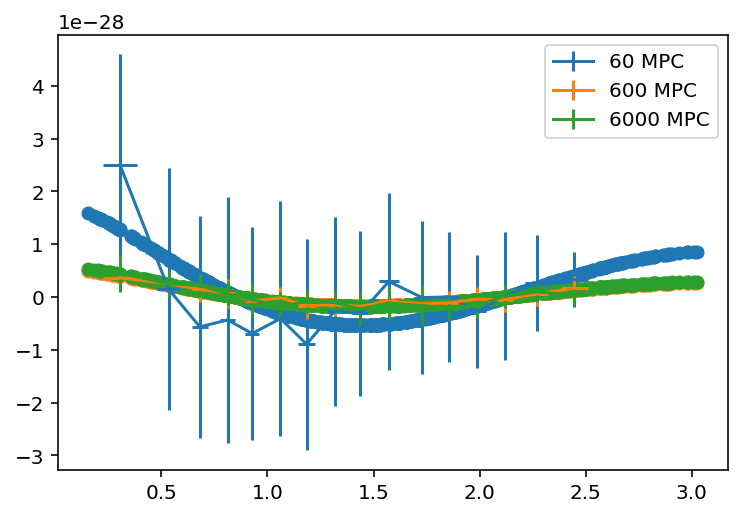

In [106]:
fig, ax = plt.subplots()

for dist in dist_dict.keys():
    dist_dict_local = dist_dict[dist]
    
    inds = xi.argsort()
    N_seps = len(xi)
    avg_seps = 30
    xi = np.array(dist_dict_local["xi"])
    rho = np.array(dist_dict_local["rho"])
    avg_correlation = [np.average(rho[inds][avg_seps * i:avg_seps * (i + 1)]) for i in range(N_seps // avg_seps - 1)]
    stdev_xi  = [np.std(xi[inds][avg_seps * i:avg_seps * (i + 1)]) for i in range(N_seps // avg_seps - 1)]
    stdev_correlation  = [np.std(rho[inds][avg_seps * i:avg_seps * (i + 1)]) for i in range(N_seps // avg_seps - 1)]
    avg_xi = [np.average(xi[inds][avg_seps * i:avg_seps * (i + 1)]) for i in range(N_seps // avg_seps - 1)]
    
    omc2 = (1 - np.cos(xi)) / 2
    hd = dist_dict_local["os"] * (1.5 * omc2 * np.log(omc2) - 0.25 * omc2 + 0.5)
    ax.scatter(xi, hd)

    ax.errorbar(avg_xi, np.array(avg_correlation) , xerr = stdev_xi, yerr = np.array(stdev_correlation), label = f'{dist} MPC')
    
ax.legend()

<ErrorbarContainer object of 3 artists>

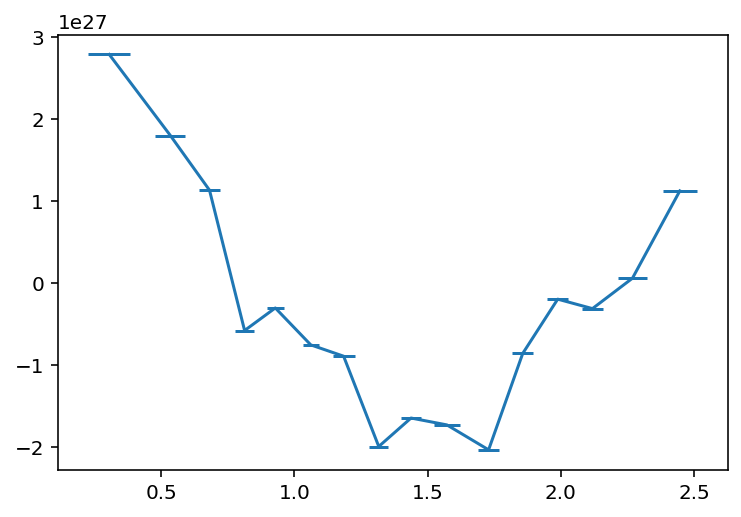

In [83]:
fig, ax = plt.subplots()
ax.errorbar(avg_xi, np.array(avg_correlation) / inj_gwb["amp"]**2, xerr = stdev_xi, yerr = stdev_correlation, label = f'{dist} MPC')


In [61]:
pta = crnPTA(psrs,fixedGamma=True)

In [62]:
os_func = optimal_statistic.OptimalStatistic(psrs, pta = pta, orf = 'hd', gamma_common = 13/3)

In [63]:
p0 = {'gw_log10_A':-14
     }
xi, rho, sig, os_func, os_func = os.compute_os(p0)

inds = xi.argsort()

N_seps = len(xi)
avg_seps = 30

avg_correlation = [np.average(rho[inds][avg_seps * i:avg_seps * (i + 1)]) for i in range(N_seps // avg_seps - 1)]
stdev_xi  = [np.std(xi[inds][avg_seps * i:avg_seps * (i + 1)]) for i in range(N_seps // avg_seps - 1)]
stdev_correlation  = [np.std(rho[inds][avg_seps * i:avg_seps * (i + 1)]) for i in range(N_seps // avg_seps - 1)]
avg_xi = [np.average(xi[inds][avg_seps * i:avg_seps * (i + 1)]) for i in range(N_seps // avg_seps - 1)]

<ErrorbarContainer object of 3 artists>

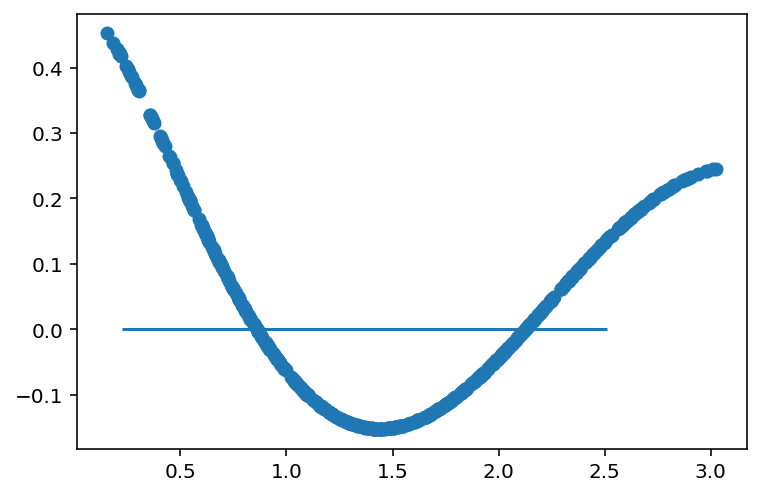

In [105]:
fig, ax = plt.subplots()
ax.errorbar(avg_xi, avg_correlation, xerr = stdev_xi, yerr = stdev_correlation)